# TimeSeries Sales Predictor

<div class="section-container">
    <h2>Loading Libraries</h2>
</div>
<style>
    .section-container {
        background-color: #f0f0f0;
        border-left: 6px solid #4CAF50; /* Green left border */
        padding: 20px;
        margin-bottom: 20px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        border-radius: 5px;
    }
    
    .section-container h2 {
        color: #333333;
        font-size: 24px;
        margin-bottom: 10px;
        border-bottom: 2px solid #4CAF50;
        padding-bottom: 5px;
    }
</style>

In [3]:
## Loading Libraries

import numpy as np
import pandas as pd
from math import sqrt

## For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# set theme
sns.set_style('whitegrid')
plt.rc('font', size=14)
plt.style.use('tableau-colorblind10')

<div class="section-container">
    <h2>First Look To The Data</h2>
</div>
<style>
    .section-container {
        background-color: #f0f0f0;
        border-left: 6px solid #4CAF50; /* Green left border */
        padding: 20px;
        margin-bottom: 20px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        border-radius: 5px;
    }
    
    .section-container h2 {
        color: #333333;
        font-size: 24px;
        margin-bottom: 10px;
        border-bottom: 2px solid #4CAF50;
        padding-bottom: 5px;
    }
</style>

In [4]:
df = pd.read_csv(r"C:\Users\sridh\Downloads\archive (1)\train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


<div class="section-container">
    <h2>Exploraoty Data Analysis</h2>
</div>
<style>
    .section-container {
        background-color: #f0f0f0;
        border-left: 6px solid #4CAF50; /* Green left border */
        padding: 20px;
        margin-bottom: 20px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        border-radius: 5px;
    }
    
    .section-container h2 {
        color: #333333;
        font-size: 24px;
        margin-bottom: 10px;
        border-bottom: 2px solid #4CAF50;
        padding-bottom: 5px;
    }
</style>

In [5]:
# summary statistics
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [6]:
# shape
df.shape

(9800, 18)

In [7]:
# data types
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

### We can see that Date columns is of **Object** types, Let's change it into **Date** datatype.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [9]:
# change datatype of Date columns.
df['order_date']= pd.to_datetime(df['Order Date'], dayfirst=True)
df['ship_date']= pd.to_datetime(df['Ship Date'], dayfirst=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   object        
 3   Ship Date      9800 non-null   object        
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [11]:
# Create `Year-Month`, 'year' and 'month' columns.
df['year_month']= df['order_date'].apply(lambda x: x.strftime("%Y-%m"))
df['year']= df['order_date'].dt.year
df['month']=df['order_date'].dt.month_name()

# Create a column for Number of Days require to ship the product.
df['ship_in_days']= (df['ship_date']- df['order_date']).dt.days

# Viewing first five rows of data.
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,order_date,ship_date,year_month,year,month,ship_in_days
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017-11-08,2017-11-11,2017-11,2017,November,3
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-11-08,2017-11-11,2017-11,2017,November,3
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-06-12,2017-06-16,2017-06,2017,June,4
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-10-11,2016-10-18,2016-10,2016,October,7
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016-10-11,2016-10-18,2016-10,2016,October,7


<div class="section-container">
    <h2>Visualizing Data To Get Insights</h2>
</div>
<style>
    .section-container {
        background-color: #f0f0f0;
        border-left: 6px solid #4CAF50; /* Green left border */
        padding: 20px;
        margin-bottom: 20px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        border-radius: 5px;
    }
    
    .section-container h2 {
        color: #333333;
        font-size: 24px;
        margin-bottom: 10px;
        border-bottom: 2px solid #4CAF50;
        padding-bottom: 5px;
    }
</style>

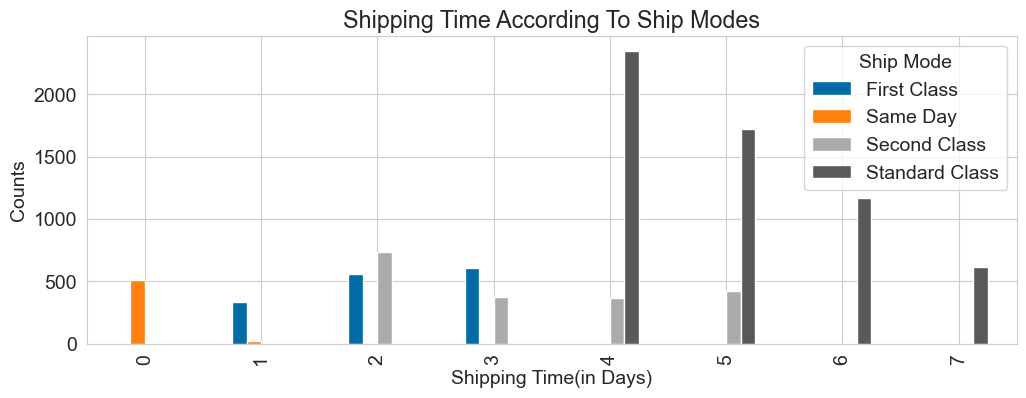

In [12]:
# Shipping Time observation accourding to ShipModes.
a = df.groupby(by= [ 'ship_in_days', 'Ship Mode']).count()['Order ID']

# plot
a.unstack().plot(kind='bar', figsize=(12, 4))

plt.xlabel("Shipping Time(in Days)")
plt.ylabel("Counts")
plt.title("Shipping Time According To Ship Modes")
plt.show()

In [13]:
# Let's consider standard shipping days is 4. if shipping time is greater than 4 days then consider it as delayed.
df['delayed']= df['ship_in_days']>4
# Feature columns
features = ['Order ID','Customer ID', 'Product ID', 'order_date', 'ship_date', 'Product Name', 'Country', 'Region', 'State', 'City', 
            'Segment', 'Category', 'Sub-Category', 'Ship Mode', 'YearMonth', 'year', 'month', 'shipInDays', 'is_delayed', 'Sales']

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,order_date,ship_date,year_month,year,month,ship_in_days,delayed
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017-11-08,2017-11-11,2017-11,2017,November,3,False
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-11-08,2017-11-11,2017-11,2017,November,3,False
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-06-12,2017-06-16,2017-06,2017,June,4,False
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-10-11,2016-10-18,2016-10,2016,October,7,True
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016-10-11,2016-10-18,2016-10,2016,October,7,True


In [14]:
df['delayed'] = df.delayed.map({True:1, False:0})

In [15]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,order_date,ship_date,year_month,year,month,ship_in_days,delayed
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.96,2017-11-08,2017-11-11,2017-11,2017,November,3,0
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017-11-08,2017-11-11,2017-11,2017,November,3,0


In [16]:
# create a column for days of week.
df['week_day'] = df.order_date.dt.weekday
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,order_date,ship_date,year_month,year,month,ship_in_days,delayed,week_day
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.96,2017-11-08,2017-11-11,2017-11,2017,November,3,0,2
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017-11-08,2017-11-11,2017-11,2017,November,3,0,2


In [17]:
# Check Missing data
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
order_date        0
ship_date         0
year_month        0
year              0
month             0
ship_in_days      0
delayed           0
week_day          0
dtype: int64

In [18]:
# check for duplicate rows.
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()

# Trends and Seasonality

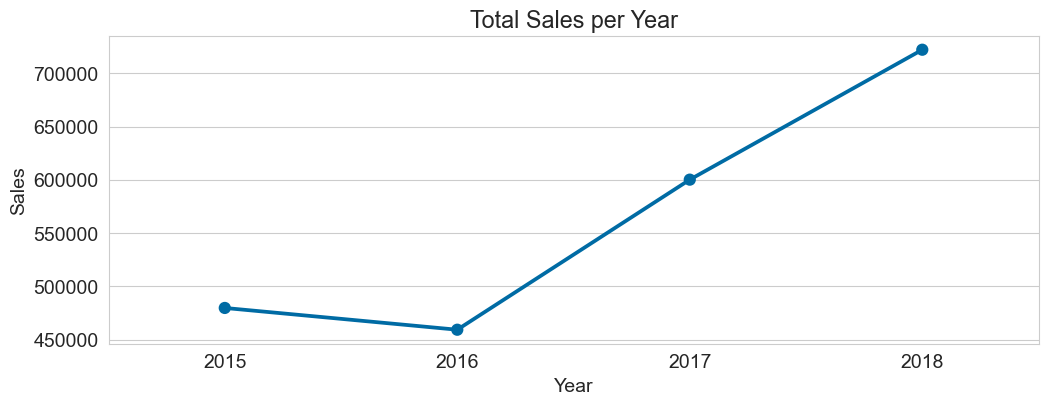

In [19]:
# Let's examine Sales over time.
numeric_columns = df.select_dtypes(include=['number']).columns
a = df.groupby('year')[numeric_columns].sum()
plt.figure(figsize=(12, 4))
sns.pointplot(x= a.index, y='Sales', data=a)

plt.xlabel('Year')
plt.ylabel('Sales')
plt.title("Total Sales per Year")

plt.show()

In [20]:
a

,Row ID,Postal Code,Sales,year,ship_in_days,delayed,week_day
year,,,,,,,
2015,9508700,110842145.0,479856.2081,3935295,7804,791,5564
2016,9948341,108836271.0,459436.0054,4142880,8294,838,6073
2017,12254092,138178437.0,600192.5500,5111078,9998,1037,7654
2018,16313767,183213700.0,722052.0192,6574644,12723,1266,10047


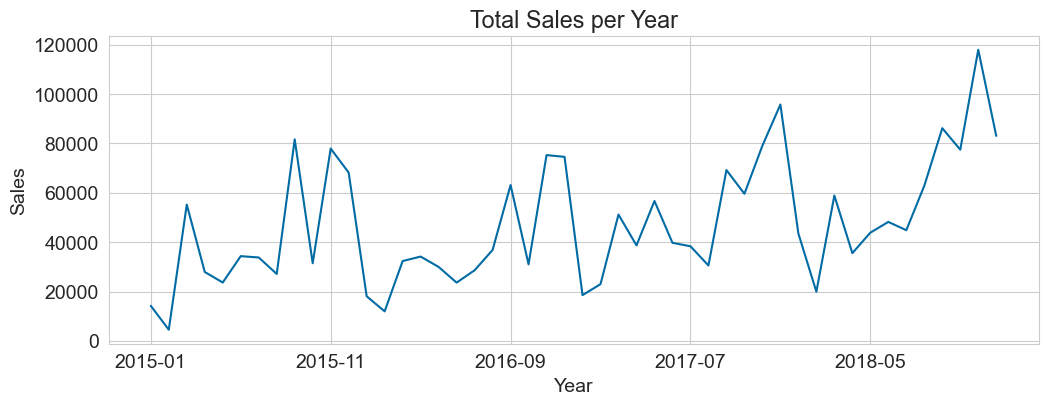

In [21]:
# Year-to-Year observation of TotalSales.
numeric_columns = df.select_dtypes(include=['number']).columns
a= pd.DataFrame(df.groupby('year_month')[numeric_columns].sum())['Sales']

plt.figure(figsize=(12, 4))
a.plot(kind='line')

plt.xlabel('Year')
plt.ylabel('Sales')
plt.title("Total Sales per Year")
plt.show()

#####                          There is an increaing sales at some months so it means there is a seasonality

In [22]:
a.head(5)

year_month
2015-01    14205.707
2015-02     4519.892
2015-03    55205.797
2015-04    27906.855
2015-05    23644.303
Name: Sales, dtype: float64

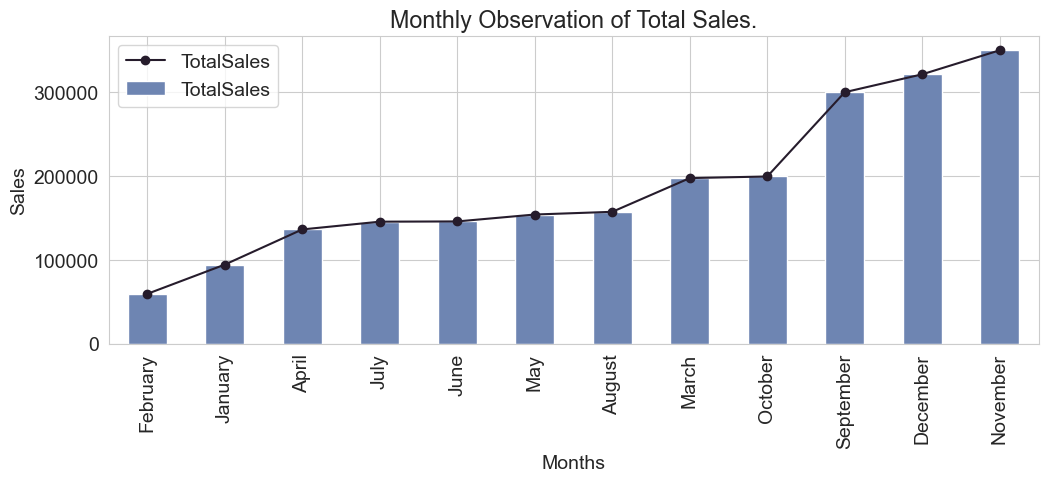

In [23]:
# Let's examine Sales over months.
numeric_columns = df.select_dtypes(include=['number']).columns
a= df.groupby(by='month')[numeric_columns].sum()['Sales']
a = a.sort_values()

# plot
plt.figure(figsize=(12, 4))
a.plot(kind='line', color="#261C2C", marker='o', label='TotalSales')
a.plot(kind='bar', color="#6E85B2", label='TotalSales')

plt.xlabel('Months')
plt.ylabel("Sales")
plt.title("Monthly Observation of Total Sales.")

plt.legend()
plt.show()

##### This plot shows that there is low sales at start of year and high at the end

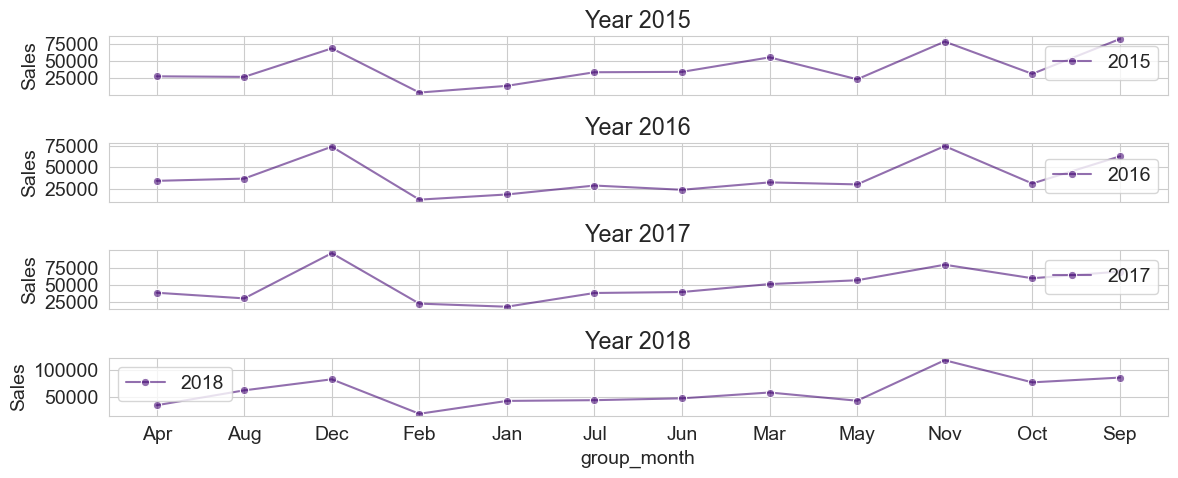

In [24]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has 'year' and 'month' columns

# Select only numeric columns for the groupby operation
numeric_columns = df.select_dtypes(include=['number']).columns

# Group by 'year' and 'month', then sum the numeric columns
a = df.groupby(['year', 'month'])[numeric_columns].sum()

# Rename the columns to avoid conflict during reset_index
a.index.names = ['group_year', 'group_month']

# Reset the index
b = a.reset_index()

# Format the month column to display only the first three characters
b['group_month'] = b['group_month'].apply(lambda x: x[:3])

# Group by 'year' and 'month' again and sum the 'Sales' column
monthSales_data = b.groupby(['group_year', 'group_month']).sum()['Sales']

# Plotting
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12, 5), sharex=True)

yrs = [2015, 2016, 2017, 2018]
for i in range(4):
    yr = yrs[i]
    sales_data = monthSales_data.loc[yr]
    sns.lineplot(x=sales_data.index, y=sales_data.values, ax=ax[i], label=yr, marker="o", color="#3F007190")
    ax[i].set_ylabel('Sales')
    ax[i].set_title(f"Year {yr}")

plt.tight_layout()
plt.show()


##### We can see that,There is rise in months of **December**, **November**, and **September**. The **same pattern observed in each year**, however it appears at the different levels.

In [25]:
b.head()

,group_year,group_month,Row ID,Postal Code,Sales,year,ship_in_days,delayed,week_day
0,2015,Apr,641208,7318088.0,27906.8550,261950,522,54,405
1,2015,Aug,660411,8097400.0,27117.5365,294190,597,55,439
2,2015,Dec,1334401,16158704.0,68167.0585,552110,1085,110,874
3,2015,Feb,272235,3049775.0,4519.8920,92690,192,13,127
4,2015,Jan,326299,4261212.0,14205.7070,155155,323,41,137


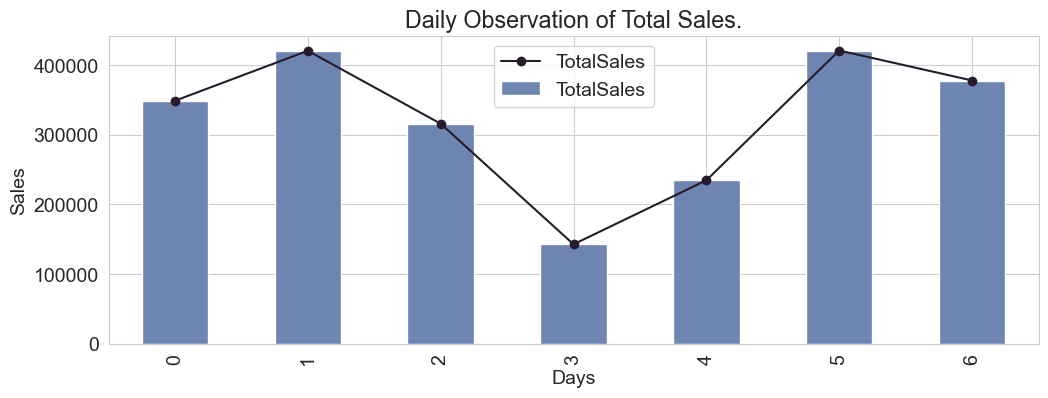

In [26]:
# Let's examine Sales over days.
numeric_columns = df.select_dtypes(include=['number']).columns
a= df.groupby(by='week_day')[numeric_columns].sum()['Sales']


# plot
plt.figure(figsize=(12, 4))
a.plot(kind='line', color="#261C2C", marker='o', label='TotalSales')
a.plot(kind='bar', color="#6E85B2", label='TotalSales')

plt.xlabel('Days')
plt.ylabel("Sales")
plt.title("Daily Observation of Total Sales.")

plt.legend()
plt.show()

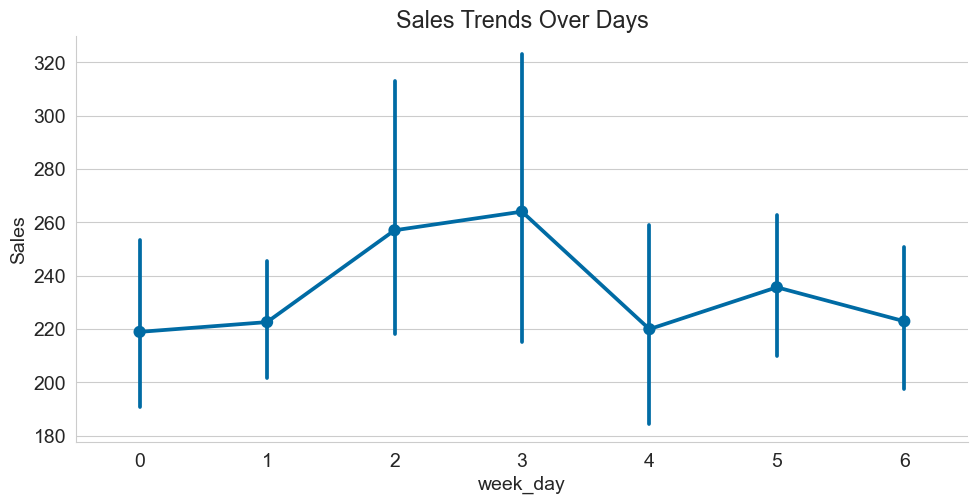

In [27]:
# Sales trends over days.
sns.catplot(data=df, x='week_day', y='Sales', kind='point', aspect=2)

plt.title("Sales Trends Over Days")
plt.show()

# Density Plots

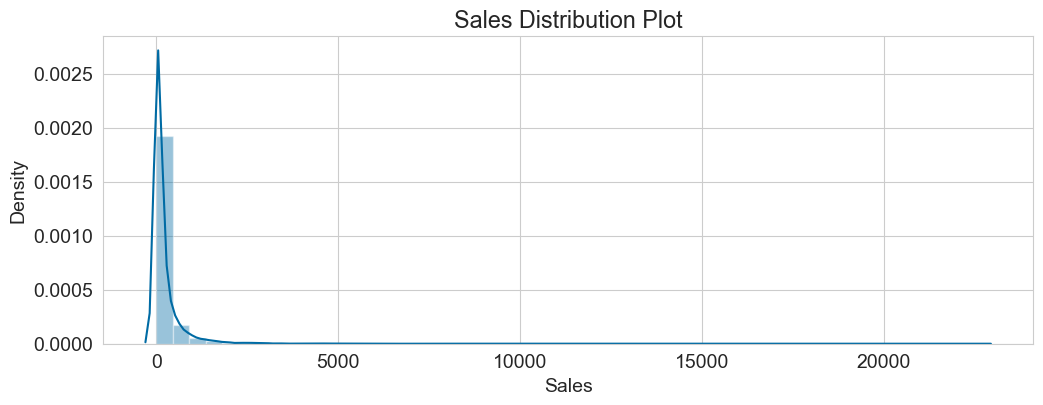

In [28]:
# Sales Distribution
plt.figure(figsize=(12, 4))
sns.distplot(df.Sales)

plt.title('Sales Distribution Plot')
plt.show()

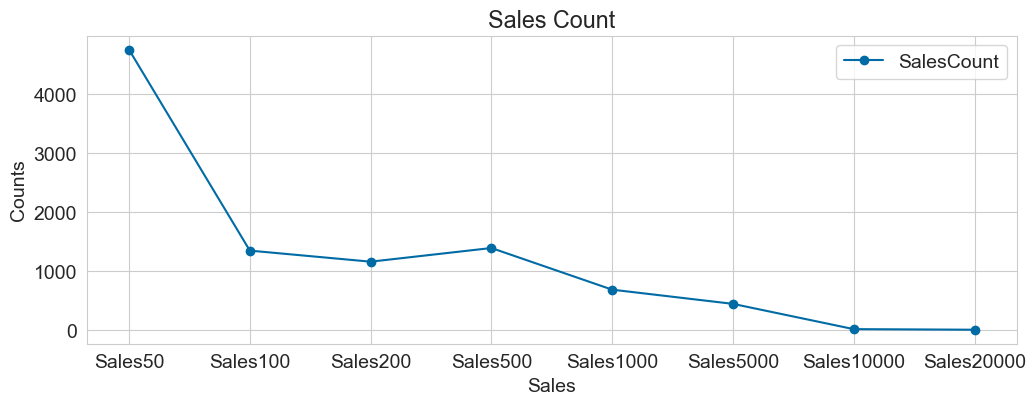

In [29]:
bins = [0, 50, 100, 200, 500, 1000, 5000, 10000, 20000]
labels=['Sales50', 'Sales100', 'Sales200', 'Sales500', 'Sales1000', 'Sales5000', 'Sales10000', 'Sales20000']
a = pd.DataFrame(pd.cut(df['Sales'], bins=bins, labels=labels))
a['SalesCount'] = df['Order ID']

# visualization
a.groupby('Sales').count().plot(kind='line', marker='o', figsize=(12, 4))

plt.ylabel("Counts")
plt.title("Sales Count")

plt.legend()
plt.show()

The plot shows that there is more than **4000** product with sales value **less than 50**.

## Box and Whisker plots for Distribution.
Yearly observation of Distribution of Data. This will gives us an idea of spread of observation for each year.

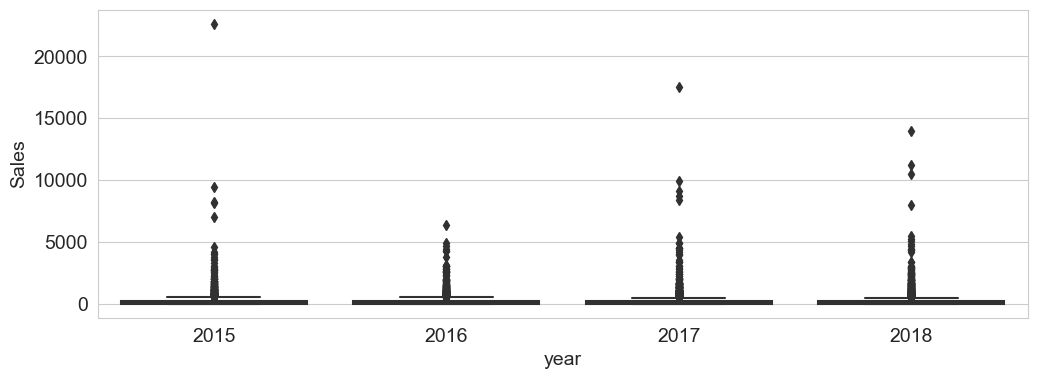

In [30]:
# check for outliers in Sales.
plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x='year', y='Sales', saturation=0.5)
plt.show()

# Building a Model

## 1. XGBoost

In [34]:
from xgboost import XGBRegressor
# Select only numeric columns for the groupby operation
numeric_columns = df.select_dtypes(include=['number']).columns
xgb_sales = pd.DataFrame(df.groupby(by=['order_date'])[numeric_columns].sum())

x = xgb_sales.drop('Sales', axis=1)
y = xgb_sales['Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.3, random_state=42)

model = XGBRegressor(learning_rate=0.03, max_depth=1,)
model.fit(x_train, y_train)

preds = model.predict(x_test)
rmse_xgb = sqrt(mean_squared_error(y_test, preds))
model_score = model.score(x_test, y_test)

print("Root Mean Squared Error for XGBoost:", rmse_xgb)
print("Model Score:", model_score)

Root Mean Squared Error for XGBoost: 1739.9783022844663
Model Score: 0.35062993036249


In [37]:
pip install lightgbm


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 1.9 MB/s eta 0:00:01
   --- ------------------------------------ 0.1/1.4 MB 2.1 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.4 MB 1.6 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.4 MB 2.1 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.4 MB 2.0 MB/s eta 0:00:01
   ------------------ --------------------- 0.7/1.4 MB 2.5 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.4 MB 2.6 MB/s eta 0:00:01
   -------------------------- ------------- 1.0/1.4 MB 2.6 MB/s eta 0:00:01
   -------------------------------- ------- 1.2/1.4 MB 3.0 MB/s eta 0:00:01
   -------------------------------- ------- 1.2/1.4 MB 3.0 MB/s eta 0:00:01
   -------------------------------------- - 1.4/1.4 MB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 2.8 MB/s eta 0:00:00


## 2. LightGBM

In [38]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Prepare data
numeric_columns = df.select_dtypes(include=['number']).columns
xgb_sales = pd.DataFrame(df.groupby(by=['order_date'])[numeric_columns].sum())

x = xgb_sales.drop('Sales', axis=1)
y = xgb_sales['Sales']

# Replace whitespace in feature names
x.columns = x.columns.str.replace(' ', '_')

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

# Create the LightGBM data containers
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test, reference=train_data)

# Define parameters
params = {
    'learning_rate': 0.03,
    'max_depth': 6,  # Increased max depth
    'num_leaves': 31,
    'objective': 'regression',
    'metric': 'rmse',
    'force_col_wise': True  # Force column-wise multi-threading
}

# Train the model
model = lgb.train(
    params,
    train_data,
    valid_sets=[test_data],
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

# Predict
preds = model.predict(x_test, num_iteration=model.best_iteration)

# Calculate metrics
rmse_lgb = sqrt(mean_squared_error(y_test, preds))
mae_lgb = mean_absolute_error(y_test, preds)
r2_lgb = r2_score(y_test, preds)
model_score = r2_lgb  # Using R-squared as the model score

print("Root Mean Squared Error for LightGBM:", rmse_lgb)
print("Mean Absolute Error for LightGBM:", mae_lgb)
print("R-squared for LightGBM:", r2_lgb)
print("Model Score for LightGBM:", model_score)


[LightGBM] [Info] Total Bins 762
[LightGBM] [Info] Number of data points in the train set: 861, number of used features: 6
[LightGBM] [Info] Start training from score 1906.090125
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

## 3. RandomForestRegressor

In [39]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Assuming x and y are defined from your previous preprocessing steps

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Predict on test data
preds = rf_model.predict(x_test)

# Calculate evaluation metrics
rmse_rf = sqrt(mean_squared_error(y_test, preds))
mae_rf = mean_absolute_error(y_test, preds)
r2_rf = r2_score(y_test, preds)

# Print evaluation metrics
print("Root Mean Squared Error for Random Forest:", rmse_rf)
print("Mean Absolute Error for Random Forest:", mae_rf)
print("R-squared for Random Forest:", r2_rf)


Root Mean Squared Error for Random Forest: 1558.8351728293162
Mean Absolute Error for Random Forest: 1043.512575
R-squared for Random Forest: 0.29527030795010667


## 4. Deep Learning

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt


In [41]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [42]:
# Initialize the model
model = Sequential()

# Add input layer
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))

# Add hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Add output layer
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [43]:
# Fit the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
# Predict on test data
preds = model.predict(x_test).flatten()

# Calculate evaluation metrics
rmse_dl = sqrt(mean_squared_error(y_test, preds))
mae_dl = mean_absolute_error(y_test, preds)
r2_dl = r2_score(y_test, preds)

# Print evaluation metrics
print("Root Mean Squared Error for Deep Learning:", rmse_dl)
print("Mean Absolute Error for Deep Learning:", mae_dl)
print("R-squared for Deep Learning:", r2_dl)


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 10263435.0000 - mae: 1880.5377 - val_loss: 7570166.5000 - val_mae: 1844.6512
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10479185.0000 - mae: 1980.1920 - val_loss: 7566604.5000 - val_mae: 1843.8295
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9430952.0000 - mae: 1837.2653 - val_loss: 7555828.5000 - val_mae: 1841.6089
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8795201.0000 - mae: 1853.0049 - val_loss: 7526001.5000 - val_mae: 1835.9845
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9973607.0000 - mae: 1928.4365 - val_loss: 7449224.0000 - val_mae: 1822.3484
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9768627.0000 - mae: 1882.5072 - val_loss: 7276072.0000 - val_mae: 1793.5822
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8102145.5000 - mae: 1749.5312 - val_loss: 6953442.5000 - val_mae: 1741.7323
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9

# Comparing Results

In [44]:
result = pd.DataFrame([[rmse_xgb], [rmse_lgb],[rmse_rf ],[rmse_dl]], columns=['RMSE'], index=['XGBRegressor','LightGBM','RandomForest','Sequential'])
result

,RMSE
XGBRegressor,1739.978302
LightGBM,1455.529861
RandomForest,1558.835173
Sequential,1478.935915


##### So, LightGBM giving the best RMSE